# Applied Math Lab 13  - grouping data

In this lab we will work with the full pokemon dataset

In [18]:
import pandas as pd
import numpy as np
pokemons = pd.read_csv("./Pokemon.csv")

In [2]:
pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## groupby

Sometimes we want to group rows in our dataset to better extract data from it. We can do it by using the `groupby` method on a dataframe.

In [5]:
pokemons_by_type = pokemons.groupby("Type 1")

In [6]:
pokemons_by_type

groupby returns an object that groups the data for us. We an than use aggregations to show informative info per group.

In [11]:
pokemons_by_type[["Defense"]].mean()

,Defense
Type 1,
Bug,70.724638
Dark,70.225806
Dragon,86.375000
Electric,66.295455
Fairy,65.705882
Fighting,65.925926
Fire,67.769231
Flying,66.250000
Ghost,81.187500


The above example shows the average Defense of each type

In [15]:
pokemons_by_type[["Name","Attack"]].min()

,Name,Attack
Type 1,,
Bug,Accelgor,10
Dark,Absol,50
Dragon,Altaria,50
Electric,Ampharos,30
Fairy,Aromatisse,20
Fighting,Conkeldurr,35
Fire,Arcanine,30
Flying,Noibat,30
Ghost,Banette,30


The above example outputs the name of the pokemon with the lowest attack

We can also use the `agg` or `aggregate` function and pass a function to it

In [16]:
pokemons_by_type[["Name","Attack"]].agg(min) #  note that we are not calling the min function 

,Name,Attack
Type 1,,
Bug,Accelgor,10
Dark,Absol,50
Dragon,Altaria,50
Electric,Ampharos,30
Fairy,Aromatisse,20
Fighting,Conkeldurr,35
Fire,Arcanine,30
Flying,Noibat,30
Ghost,Banette,30


We can pass `agg` multiple functions for aggregation and even our own function

In [40]:
def rms_agg(df:pd.Series):
    return np.sqrt(np.mean(df**2))

pokemons_by_type[["Name","Attack"]].agg([min,max,rms_agg])

Attack                 
            min  max     rms_agg
Type 1                          
Bug          10  185   79.931402
Dark         50  150   91.951951
Dragon       50  180  116.940156
Electric     30  123   72.975712
Fairy        20  131   67.962793
Fighting     35  145  100.680830
Fire         30  160   89.429173
Flying       30  115   85.183625
Ghost        30  165   79.335719
Grass        27  132   77.429323
Ground       40  180  101.127704
Ice          30  130   77.500000
Normal        5  160   79.411740
Poison       43  106   77.126288
Psychic      20  190   82.853178
Rock         40  165   99.212811
Steel        24  150   97.381837
Water        10  155   79.350882

It is also possible to group by multiple columns by passing an array of columns to groupby

In [41]:
by_type_subtype = pokemons.groupby(["Type 1","Type 2"])
by_type_subtype[["Attack","Defense"]].aggregate([len,min,max,np.mean]) # same as agg

Attack                       Defense                     
                   len  min  max        mean     len min  max        mean
Type 1 Type 2                                                            
Bug    Electric      2   47   77   62.000000       2  50   60   55.000000
       Fighting      2  125  185  155.000000       2  75  115   95.000000
       Fire          2   60   85   72.500000       2  55   65   60.000000
       Flying       14   20  155   70.142857      14  30  120   61.571429
       Ghost         1   90   90   90.000000       1  45   45   45.000000
...                ...  ...  ...         ...     ...  ..  ...         ...
Water  Ice           3   70   95   83.333333       3  80  180  113.333333
       Poison        3   40   95   68.333333       3  35   75   58.333333
       Psychic       5   65   75   73.000000       5  65  180  104.000000
       Rock          4   55  108   82.750000       4  85  133  112.750000
       Steel         1   86   86   86.000000       1  88   88   88.000000

[136 rows x 8 columns]

## ploting

If we want to plot data from a dataframe, we can save alot of time and code by just calling the `plot` method of a dataframe

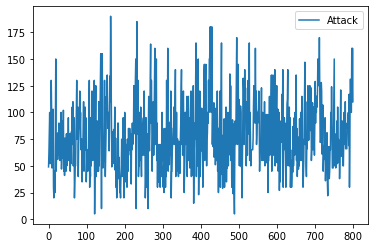

In [43]:
pokemons[["Attack"]].plot()

We can see that to achieve something useful we need to carefuly construct the plot. using groupby will come in handy.

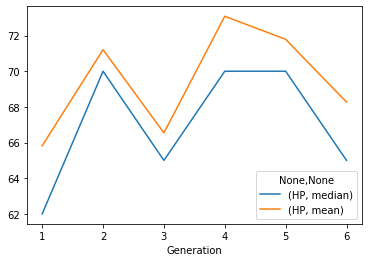

In [64]:
pokemons.groupby("Generation")[["HP"]].agg([np.median,np.mean]).plot()

We can see the average and median HP in each generation of pokemons

We can iterate over the groups in a grouped data frame to achieve more meaningful data. combined with some filtering and some styling:

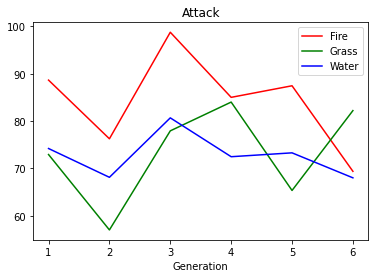

In [79]:
colors = {"Fire":"r","Grass":"g","Water":"b"}
filt = pokemons["Type 1"].isin(["Fire","Grass","Water"])
by_type =  pokemons[filt].groupby(["Type 1"])
for key,grp in by_type:
    by_gen = grp.groupby("Generation")
    by_gen["Attack"].mean().plot(c=colors[key], label=key,legend=True,title="Attack")

The above example shows the mean attack of fire,grass,